In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loan_data=pd.read_csv('/content/loan_approval_dataset.csv')
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
loan_data.shape

(4269, 13)

In [4]:
loan_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
loan_data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
loan_data.columns = loan_data.columns.str.strip()
for col in loan_data.select_dtypes(include=['object']).columns:
    loan_data[col] = loan_data[col].str.strip()


<Axes: xlabel='loan_status', ylabel='count'>

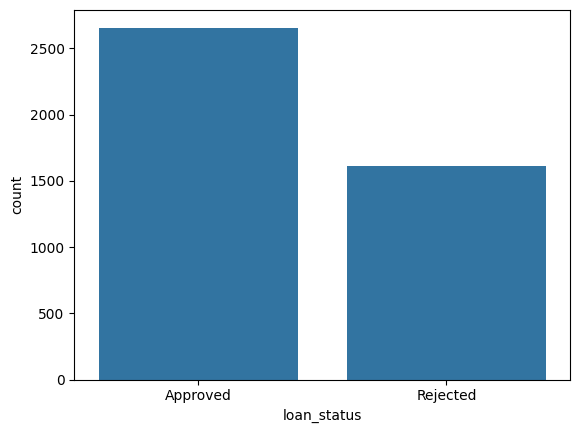

In [8]:
sns.countplot(x='loan_status',data=loan_data)

<Axes: xlabel='education', ylabel='count'>

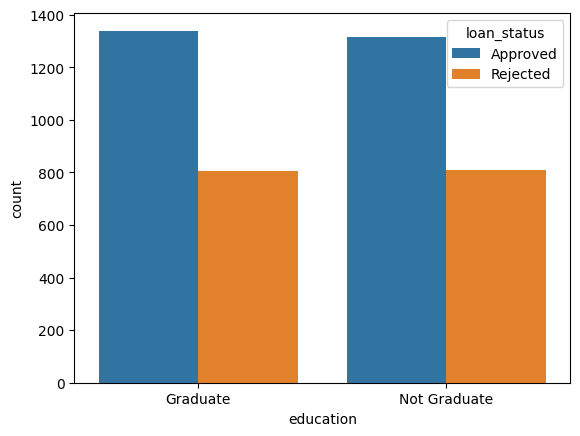

In [9]:
sns.countplot(x="education",hue="loan_status",data=loan_data)

<Axes: xlabel='self_employed', ylabel='count'>

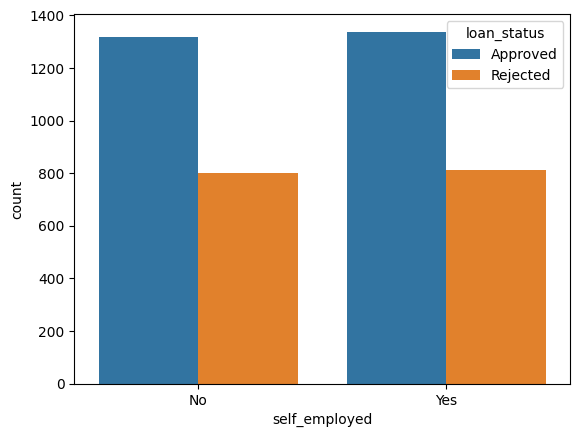

In [10]:
sns.countplot(x="self_employed",hue="loan_status",data=loan_data)

<Axes: xlabel='cibil_score', ylabel='Count'>

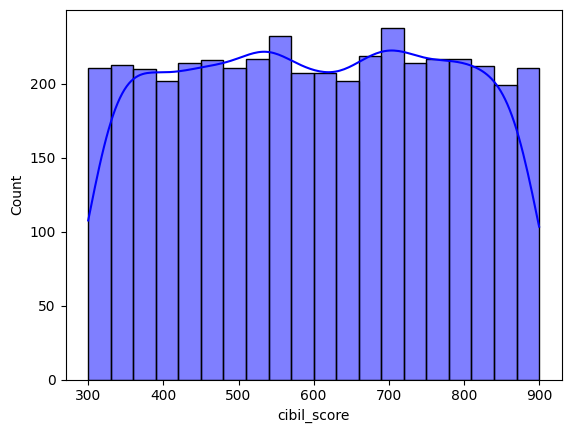

In [11]:
sns.histplot(loan_data['cibil_score'], bins=20, kde=True, color='blue')

<Axes: xlabel='income_annum', ylabel='loan_amount'>

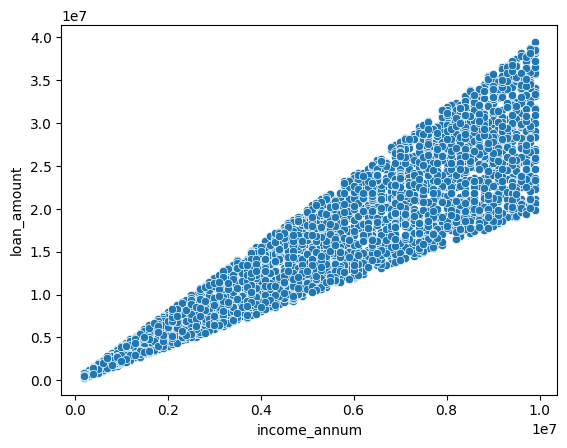

In [12]:
sns.scatterplot(x='income_annum', y='loan_amount', data=loan_data)

<Axes: xlabel='loan_term', ylabel='Count'>

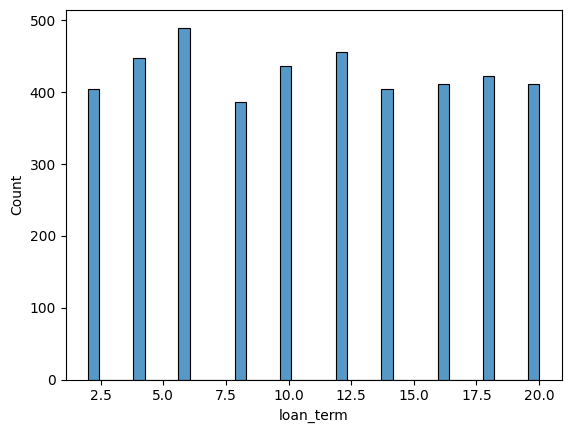

In [13]:
sns.histplot(loan_data['loan_term'], bins=40)

In [14]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label_encoder = LabelEncoder()
loan_data['education'] = label_encoder.fit_transform(loan_data['education'])
loan_data['self_employed'] = label_encoder.fit_transform(loan_data['self_employed'])
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [15]:


X = loan_data.drop(columns=['loan_status', 'loan_id'])
y = loan_data['loan_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
print(X,"\n",y,"\n",X_scaled)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          0              0       9600000     29900000   
1                    0          1              1       4100000     12200000   
2                    3          0              0       9100000     29700000   
3                    3          0              0       8200000     30700000   
4                    5          1              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          0              1       1000000      2300000   
4265                 0          1              1       3300000     11300000   
4266                 2          1              0       6500000     23900000   
4267                 1          1              0       4100000     12800000   
4268                 1          0              0       9200000     29700000   

      loan_term  cibil_score  residential_assets_va

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [24]:
print(X_train,"\n\n", X_test,"\n\n", y_train,"\n\n", y_test)

[[ 0.8853442   1.00446064 -1.00728821 ... -0.88257894 -0.66203591
  -1.06981584]
 [ 0.29562125  1.00446064  0.99276452 ... -0.31290198  2.34806418
   2.40731629]
 [ 0.8853442  -0.99555917  0.99276452 ... -0.609134   -0.73893628
  -0.91596043]
 ...
 [ 0.8853442   1.00446064  0.99276452 ...  1.28219351  1.49117437
   0.13025631]
 [-0.2941017   1.00446064  0.99276452 ... -0.83700478  0.51344113
   1.4226417 ]
 [ 0.8853442  -0.99555917 -1.00728821 ... -0.2901149   1.0517437
  -0.11591233]] 

 [[ 1.47506715 -0.99555917 -1.00728821 ...  1.14547104  0.06302469
   0.71490685]
 [-0.2941017  -0.99555917 -1.00728821 ...  1.03153565  0.29372579
   0.53028036]
 [ 0.29562125 -0.99555917 -1.00728821 ...  2.5582699   1.46920284
   0.49950928]
 ...
 [ 1.47506715  1.00446064  0.99276452 ...  1.21383228  0.755128
   1.2687863 ]
 [ 0.8853442   1.00446064 -1.00728821 ... -0.22175366  0.6562561
  -0.4851653 ]
 [-1.4735476   1.00446064  0.99276452 ... -0.97372725 -1.27723885
  -1.40829772]] 

 3404    Reject

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [20]:
print(y_pred)
print(y_test)

['Rejected' 'Rejected' 'Rejected' ... 'Approved' 'Rejected' 'Approved']
1703    Rejected
1173    Approved
308     Rejected
1322    Approved
3271    Approved
          ...   
1842    Rejected
3415    Approved
3291    Approved
2016    Rejected
679     Approved
Name: loan_status, Length: 1281, dtype: object


In [21]:
from sklearn.metrics import accuracy_score,precision_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



Accuracy: 0.8797814207650273
